In [2]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib as mpl
from matplotlib import pyplot as plt

pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

df = pd.read_csv('world-development-indicators/Indicators.csv')
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age population),SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age population)",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age population)",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


## Общее количество строк: 5 656 458

In [3]:
len(df)

5656458

### Строк, относящихся к России в целом: 17 164

In [4]:
r = df[df['CountryCode'] == 'RUS']
print("Длина: {}".format(len(r)))

display(r)

Длина: 17164


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
18282,Russian Federation,RUS,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,1960,27.851800
18283,Russian Federation,RUS,Age dependency ratio (% of working-age population),SP.POP.DPND,1960,57.360176
18284,Russian Federation,RUS,"Age dependency ratio, old (% of working-age population)",SP.POP.DPND.OL,1960,9.575730
18285,Russian Federation,RUS,"Age dependency ratio, young (% of working-age population)",SP.POP.DPND.YG,1960,47.784446
18286,Russian Federation,RUS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,23.743000
...,...,...,...,...,...,...
5653092,Russian Federation,RUS,Time required to register property (days),IC.PRP.DURS,2015,15.000000
5653093,Russian Federation,RUS,Time required to start a business (days),IC.REG.DURS,2015,10.500000
5653094,Russian Federation,RUS,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,168.000000
5653095,Russian Federation,RUS,Time to resolve insolvency (years),IC.ISV.DURS,2015,2.000000


### Число различных индикаторов, относящихся к России: 951

Многовато, надо бы попробовать как-то обобщить эти показатели, чтобы хотя бы суметь прочесть их все.
`value_counts()` для каждой характеристики покажет с скольких годах она встречается

In [26]:
r_indicators = r['IndicatorName'].value_counts()

display(r_indicators)

print(type(r_indicators))
print()

r_ind_dict = r_indicators.to_dict()

Urban population                                                                     55
Age dependency ratio, young (% of working-age population)                            55
Population in urban agglomerations of more than 1 million                            55
Population in urban agglomerations of more than 1 million (% of total population)    55
Population in the largest city (% of urban population)                               55
                                                                                     ..
Completeness of birth registration (%)                                                1
Unmet need for contraception (% of married women ages 15-49)                          1
Mammal species, threatened                                                            1
Coverage (%) -All Social Protection and Labor                                         1
Fish species, threatened                                                              1
Name: IndicatorName, Length: 951

<class 'pandas.core.series.Series'>



Сделаем следующее: создадим словарь `dict_of_first_words`:
- ключ - первое слово индакатора,
- значение - список всех характеристик, начинающихся с этого слова

In [29]:
dict_of_first_words = dict()

for k, v in sorted(r_ind_dict.items()):
    print(k, v)
    first = k.split()[0].replace(",", '')

    if first in dict_of_first_words:
        dict_of_first_words[first].append(v)
    else:
        dict_of_first_words[first] = list()
    

2005 PPP conversion factor, GDP (LCU per international $) 1
2005 PPP conversion factor, private consumption (LCU per international $) 1
Access to electricity (% of population) 4
Access to electricity, rural (% of rural population) 4
Access to electricity, urban (% of urban population) 4
Access to non-solid fuel (% of population) 4
Access to non-solid fuel, rural (% of rural population) 2
Access to non-solid fuel, urban (% of urban population) 2
Adjusted net enrolment rate, primary, both sexes (%) 9
Adjusted net enrolment rate, primary, female (%) 9
Adjusted net enrolment rate, primary, male (%) 9
Adjusted net national income (annual % growth) 21
Adjusted net national income (constant 2005 US$) 22
Adjusted net national income (current US$) 22
Adjusted net national income per capita (annual % growth) 21
Adjusted net national income per capita (constant 2005 US$) 22
Adjusted net national income per capita (current US$) 22
Adjusted net savings, excluding particulate emission damage (% of G

In [30]:
counter = 0
for k in dict_of_first_words:
    counter += 1
    print(counter, k)

1 2005
2 Access
3 Adjusted
4 Adolescent
5 Adult
6 Age
7 Agricultural
8 Agriculture
9 Air
10 Alternative
11 Annual
12 Annualized
13 Arable
14 Armed
15 Arms
16 Automated
17 Average
18 Bank
19 Battle-related
20 Bird
21 Birth
22 Births
23 Bribery
24 Broad
25 Burden
26 Business
27 CO2
28 Cash
29 Cause
30 Central
31 Cereal
32 Changes
33 Charges
34 Chemicals
35 Claims
36 Coal
37 Combustible
38 Commercial
39 Communications
40 Community
41 Compensation
42 Completeness
43 Computer
44 Consumer
45 Consumption
46 Container
47 Contraceptive
48 Contributing
49 Cost
50 Coverage
51 Crop
52 Current
53 Customs
54 DEC
55 Death
56 Delay
57 Deposit
58 Depth
59 Diabetes
60 Discrepancy
61 Distance
62 Documents
63 Domestic
64 Droughts
65 Ease
66 Electric
67 Electricity
68 Emigration
69 Employers
70 Employment
71 Energy
72 Enrolment
73 Expenditure
74 Expense
75 Export
76 Exports
77 External
78 Female
79 Fertility
80 Fertilizer
81 Final
82 Firms
83 Fish
84 Fixed
85 Food
86 Foreign
87 Forest
88 Fossil
89 Fuel
90 

Интересные индексы:

- Consumer price index (2010 = 100)
- Death rate, crude (per 1,000 people)

- О производстве электичества:

        Electricity production from coal sources (% of total) 23
        Electricity production from hydroelectric sources (% of total) 23
        Electricity production from natural gas sources (% of total) 23
        Electricity production from nuclear sources (% of total) 23
        Electricity production from oil sources (% of total) 23
        Electricity production from oil, gas and coal sources (% of total) 23
        Electricity production from renewable sources, excluding hydroelectric (% of total) 23
        Electricity production from renewable sources, excluding hydroelectric (kWh) 23
    
- О работниках:
        Employers, female (% of employment) 22
        Employers, male (% of employment) 22
        Employers, total (% of employment) 22
        Employment in agriculture (% of total employment) 25
        Employment in agriculture, female (% of female employment) 18
        Employment in agriculture, male (% of male employment) 18
        Employment in industry (% of total employment) 25
        Employment in industry, female (% of female employment) 18
        Employment in industry, male (% of male employment) 18
        Employment in services (% of total employment) 25
        Employment in services, female (% of female employment) 18
        Employment in services, male (% of male employment) 18
        
- О затратах на образование:

        Enrolment in primary education, both sexes (number) 40
        Enrolment in secondary education, both sexes (number) 26
        Enrolment in secondary general, both sexes (number) 41
        Enrolment in secondary vocational, both sexes (number) 19
        Expenditure on education as % of total government expenditure (%) 8
        Expenditure on tertiary as % of government expenditure on education (%) 8
        
        Government expenditure on education as % of GDP (%) 8
        Government expenditure per tertiary student as % of GDP per capita (%) 8
        
- О лесах

        Forest area (% of land area) 23
        Forest area (sq. km) 22
        
- О затратах на медицину

        Health expenditure per capita (current US$) 19
        Health expenditure per capita, PPP (constant 2011 international $) 19
        Health expenditure, private (% of GDP) 19
        Health expenditure, public (% of GDP) 19
        Health expenditure, public (% of government expenditure) 19
        Health expenditure, public (% of total health expenditure) 19
        Health expenditure, total (% of GDP) 19

- О доходах россиян:

        Income share held by fourth 20% 19
        Income share held by highest 10% 19
        Income share held by highest 20% 19
        Income share held by lowest 10% 19
        Income share held by lowest 20% 19
        Income share held by second 20% 19
        Income share held by third 20% 19

### Выведем все индикаторы для России за 2015-й год

In [6]:
r15 = r[r['Year'] == 2015]

print("Строк за 2015-й год: {}".format(len(r15)))
display(r15.iloc[:, [2, 3, 4, 5]])

Строк за 2015-й год: 47


,IndicatorName,IndicatorCode,Year,Value
5653050,Bank capital to assets ratio (%),FB.BNK.CAPA.ZS,2015,9.344673
5653051,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,2015,7.372377
5653052,"Bird species, threatened",EN.BIR.THRD.NO,2015,54.000000
5653053,Business extent of disclosure index (0=less disclosure to 10=more disclosure),IC.BUS.DISC.XQ,2015,6.000000
5653054,Cost of business start-up procedures (% of GNI per capita),IC.REG.COST.PC.ZS,2015,1.100000
5653055,Depth of credit information index (0=low to 8=high),IC.CRD.INFO.XQ,2015,7.000000
5653056,Distance to frontier score (0=lowest performance to 100=frontier),IC.BUS.DFRN.XQ,2015,70.990000
5653057,Ease of doing business index (1=most business-friendly regulations),IC.BUS.EASE.XQ,2015,51.000000
5653058,"Fish species, threatened",EN.FSH.THRD.NO,2015,40.000000
5653059,Improved sanitation facilities (% of population with access),SH.STA.ACSN,2015,72.200000


# 1. Изучим младенческую сметрность
- Определим младенческую смертность в России за весь доступный пероид:

In [7]:
infant_death = 'SP.DYN.IMRT.IN'

r_infant_deathes = r[r['IndicatorCode'] == infant_death]
display(r_infant_deathes.head())
display(r_infant_deathes.tail())

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
347375,Russian Federation,RUS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1970,35.4
414620,Russian Federation,RUS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1971,34.1
484228,Russian Federation,RUS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1972,32.9
553778,Russian Federation,RUS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1973,31.8
623633,Russian Federation,RUS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1974,30.8


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5163518,Russian Federation,RUS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2011,9.8
5339189,Russian Federation,RUS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2012,9.3
5499500,Russian Federation,RUS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2013,8.9
5617915,Russian Federation,RUS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2014,8.5
5653069,Russian Federation,RUS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2015,8.2


- То же самое проделаем для США и... ну, скажем, Китая

In [8]:
us_infant_deathes = df[(df['CountryCode'] == 'USA') & (df['IndicatorCode'] == infant_death)]

"""
Без скобочек не работает!!
us_infant_deathes = df[df['CountryCode'] == 'USA' & df['IndicatorCode'] == infant_death]
"""

display(us_infant_deathes.head())
display(us_infant_deathes.tail())

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22351,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1960,25.9
48830,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1961,25.4
77217,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1962,24.9
105836,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1963,24.4
134874,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1964,23.8


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5195107,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2011,6.1
5370261,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2012,6.1
5527683,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2013,5.9
5637434,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2014,5.7
5655808,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2015,5.6


In [9]:
cn_infant_deathes = df[(df['CountryCode'] == 'CHN') & (df['IndicatorCode'] == infant_death)]
display(cn_infant_deathes.head())
display(cn_infant_deathes.tail())

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
274597,China,CHN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1969,84.1
316071,China,CHN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1970,80.4
379870,China,CHN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1971,76.8
448712,China,CHN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1972,73.3
518583,China,CHN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1973,69.7


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5077360,China,CHN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2011,12.5
5253114,China,CHN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2012,11.5
5423160,China,CHN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2013,10.6
5564582,China,CHN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2014,9.8
5646003,China,CHN,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2015,9.2


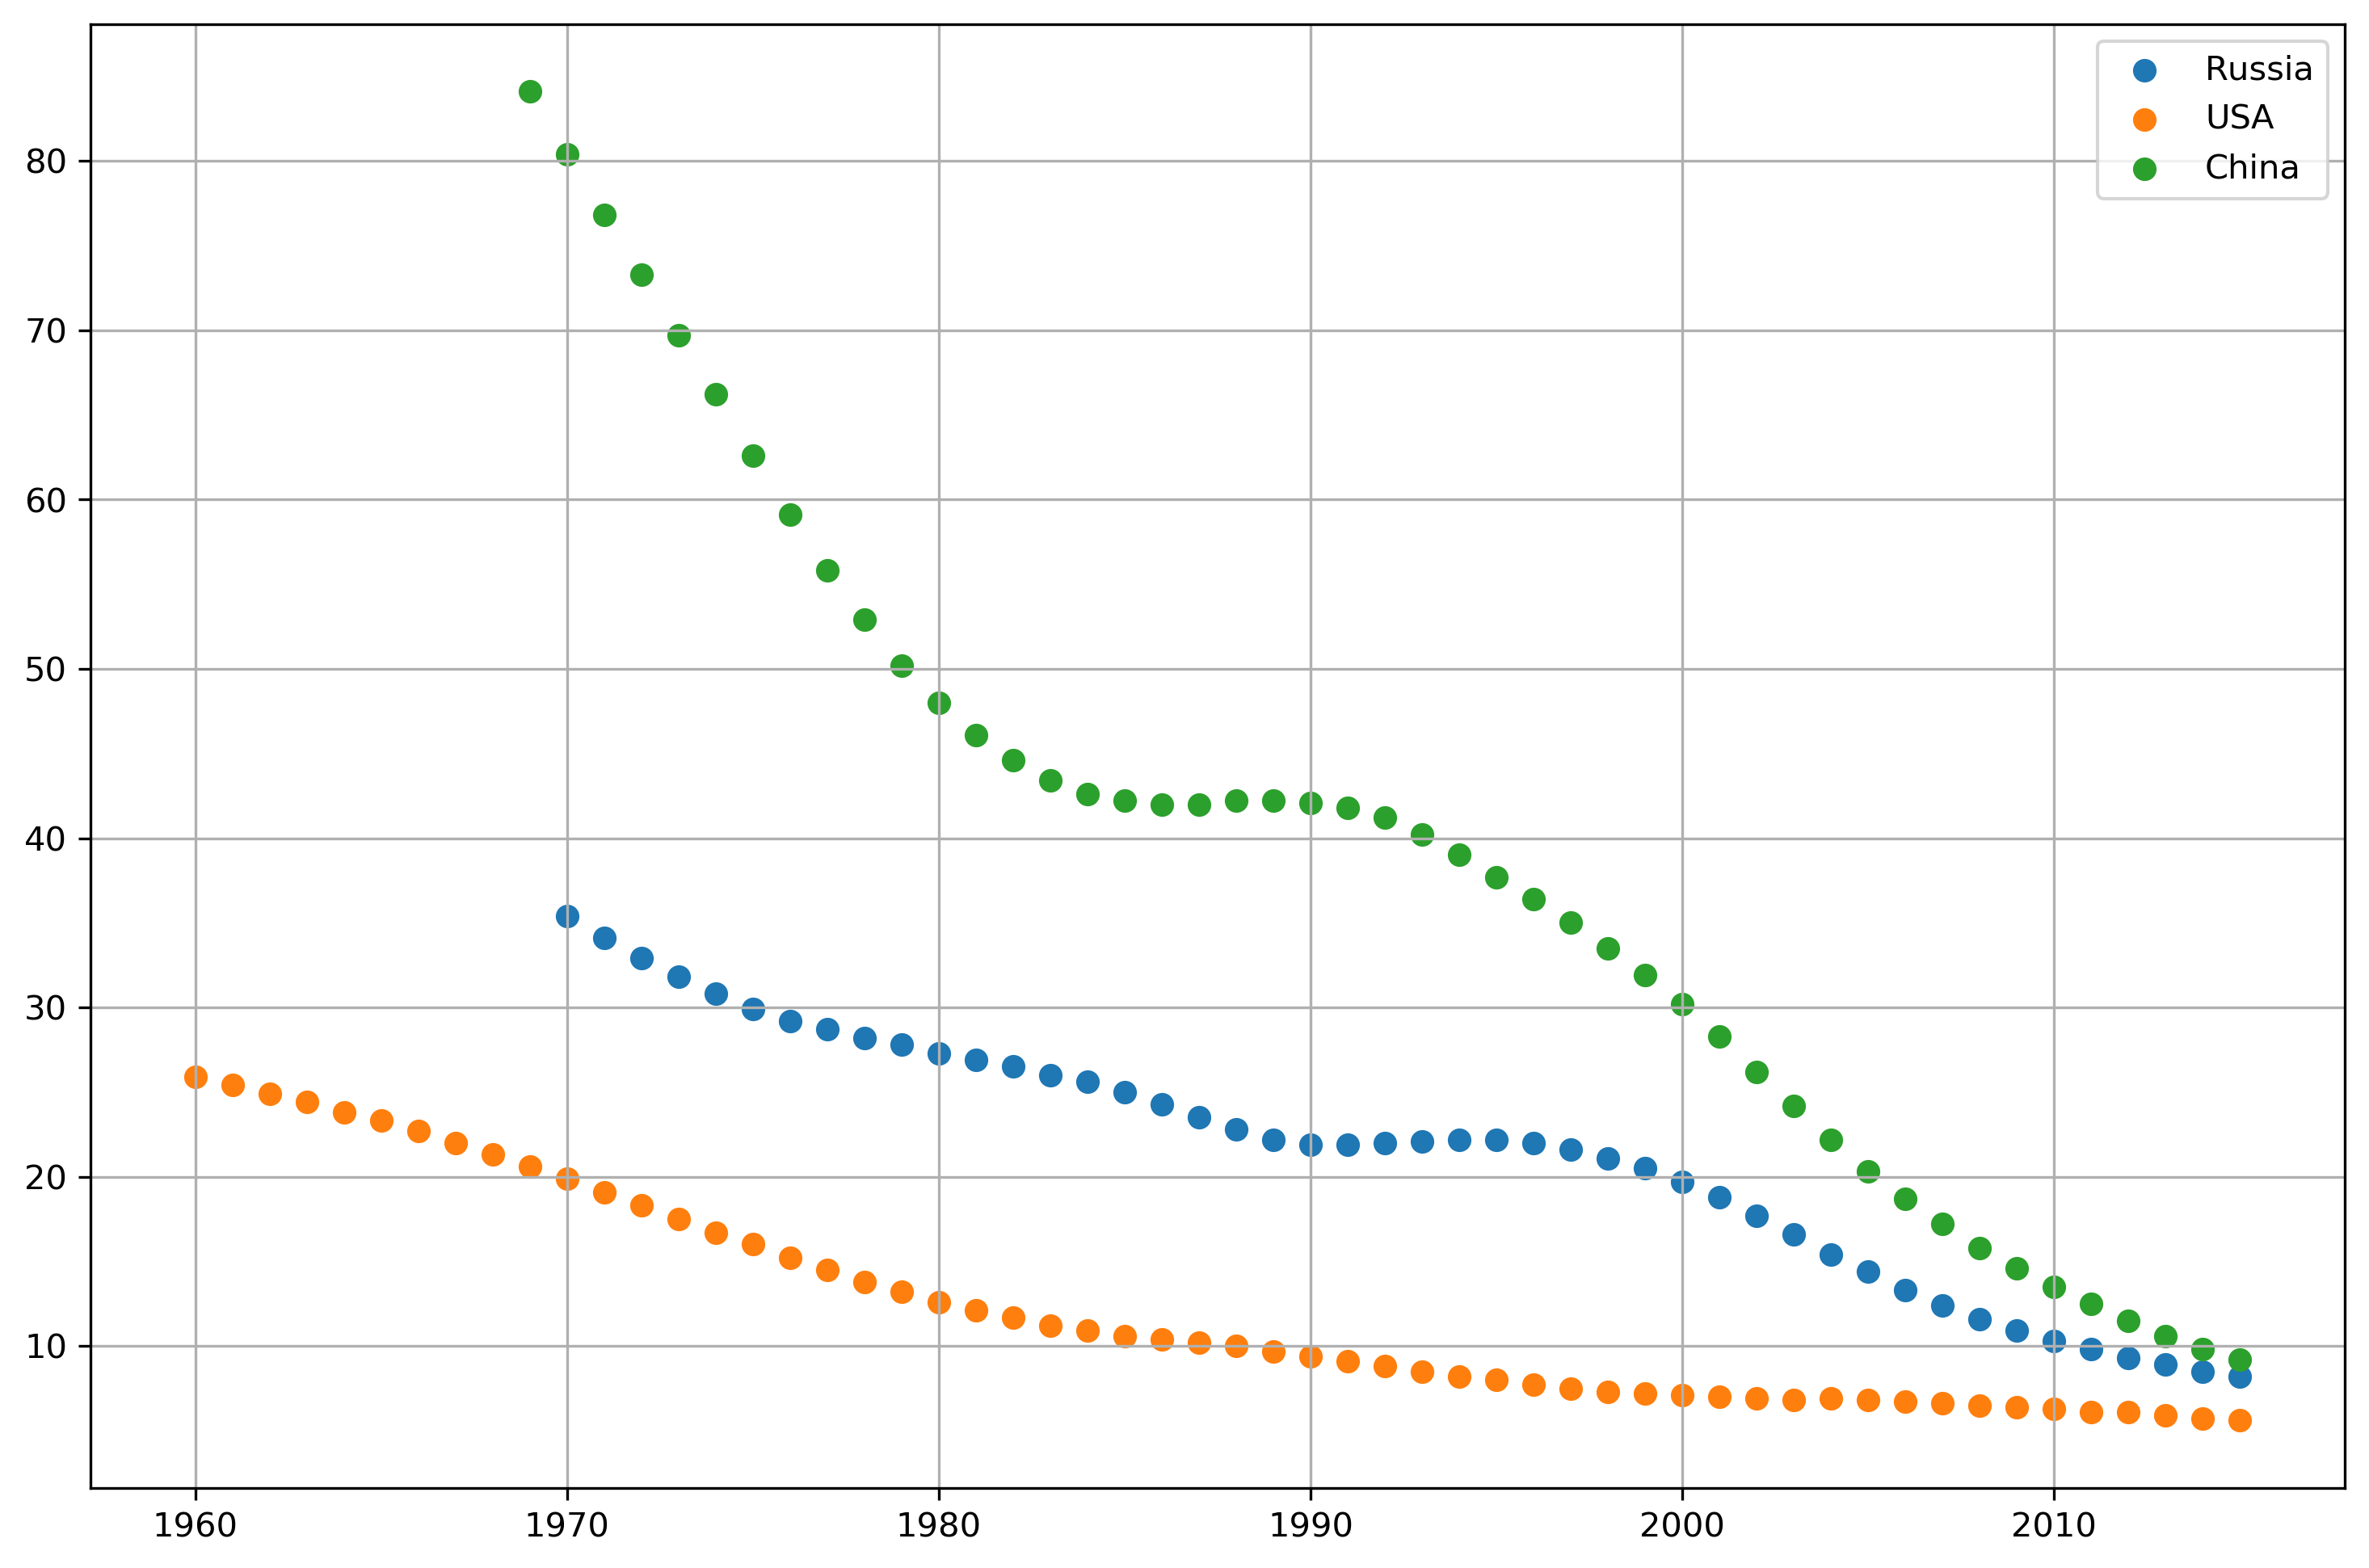

In [10]:
plt.figure(figsize = (12, 8), dpi = 300)
plt.scatter(r_infant_deathes['Year'], r_infant_deathes['Value'], label = "Russia")
plt.scatter(us_infant_deathes['Year'], us_infant_deathes['Value'], label = "USA")
plt.scatter(cn_infant_deathes['Year'], cn_infant_deathes['Value'], label = "China")

plt.grid()
plt.legend()
plt.show()